In [36]:
import numpy as np
import pandas as pd
import data_clean_utils
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler, PowerTransformer, OrdinalEncoder
from sklearn.model_selection import train_test_split

In [37]:
import dagshub
import os
os.environ["MLFLOW_TRACKING_USERNAME"] = "subham-28"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "4b86e85660afc47e87bbde5f9785be943688b792"

In [38]:
dagshub.init(repo_owner='subham-28', repo_name='ML_Projects', mlflow=True)

Initialized MLflow to track repo "subham-28/ML_Projects"

Repository subham-28/ML_Projects initialized!

In [39]:
import mlflow
mlflow.set_tracking_uri("https://dagshub.com/subham-28/ML_Projects.mlflow")

In [40]:
mlflow.set_experiment("Exp 2 - Model Selection")

<Experiment: artifact_location='mlflow-artifacts:/c085f4bf48e94783b3c9a5c3141d2429', creation_time=1750406102641, experiment_id='2', last_update_time=1750406102641, lifecycle_stage='active', name='Exp 2 - Model Selection', tags={}>

In [41]:
from sklearn import set_config

set_config(transform_output="pandas")

In [42]:
# load the data

df = pd.read_csv('swiggy.csv')

df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [43]:
data_clean_utils.perform_data_cleaning(df)

In [44]:
df = pd.read_csv('swiggy_cleaned.csv')
df

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance,distance_type
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,INDO,19,3,saturday,1,15.0,11.0,morning,3.025149,short
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,BANG,25,3,friday,0,5.0,19.0,evening,20.183530,very_long
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,BANG,19,3,saturday,1,15.0,8.0,morning,1.552758,short
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,COIMB,5,4,tuesday,0,10.0,18.0,evening,7.790401,medium
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,CHEN,26,3,saturday,1,15.0,13.0,afternoon,6.210138,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,windy,high,...,JAP,24,3,thursday,0,10.0,11.0,morning,1.489846,short
45498,AGRRES16DEL01,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,windy,jam,...,AGR,16,2,wednesday,0,15.0,19.0,evening,NaN,NaN
45499,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,cloudy,low,...,CHEN,11,3,friday,0,15.0,23.0,night,4.657195,short
45500,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,cloudy,high,...,COIMB,7,3,monday,0,5.0,13.0,afternoon,6.232393,medium


In [45]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance', 'distance_type'],
      dtype='object')

In [46]:
# drop columns not required for model input

columns_to_drop =  ['rider_id',
                    'restaurant_latitude',
                    'restaurant_longitude',
                    'delivery_latitude',
                    'delivery_longitude',
                    'order_date',
                    "order_time_hour",
                    "order_day",
                    "city_name",
                    "order_day_of_week",
                    "order_month"]

df.drop(columns=columns_to_drop, inplace=True)

df

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,24,1,15.0,morning,3.025149,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,33,0,5.0,evening,20.183530,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,26,1,15.0,morning,1.552758,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,21,0,10.0,evening,7.790401,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,30,1,15.0,afternoon,6.210138,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,30.0,4.8,windy,high,1,meal,motorcycle,0.0,no,metropolitian,32,0,10.0,morning,1.489846,short
45498,21.0,4.6,windy,jam,0,buffet,motorcycle,1.0,no,metropolitian,36,0,15.0,evening,NaN,NaN
45499,30.0,4.9,cloudy,low,1,drinks,scooter,0.0,no,metropolitian,16,0,15.0,night,4.657195,short
45500,20.0,4.7,cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,26,0,5.0,afternoon,6.232393,medium


In [47]:
df.isna().sum()

,0
age,1854
ratings,1908
weather,525
traffic,510
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,993
festival,228
city_type,1198


<Axes: >

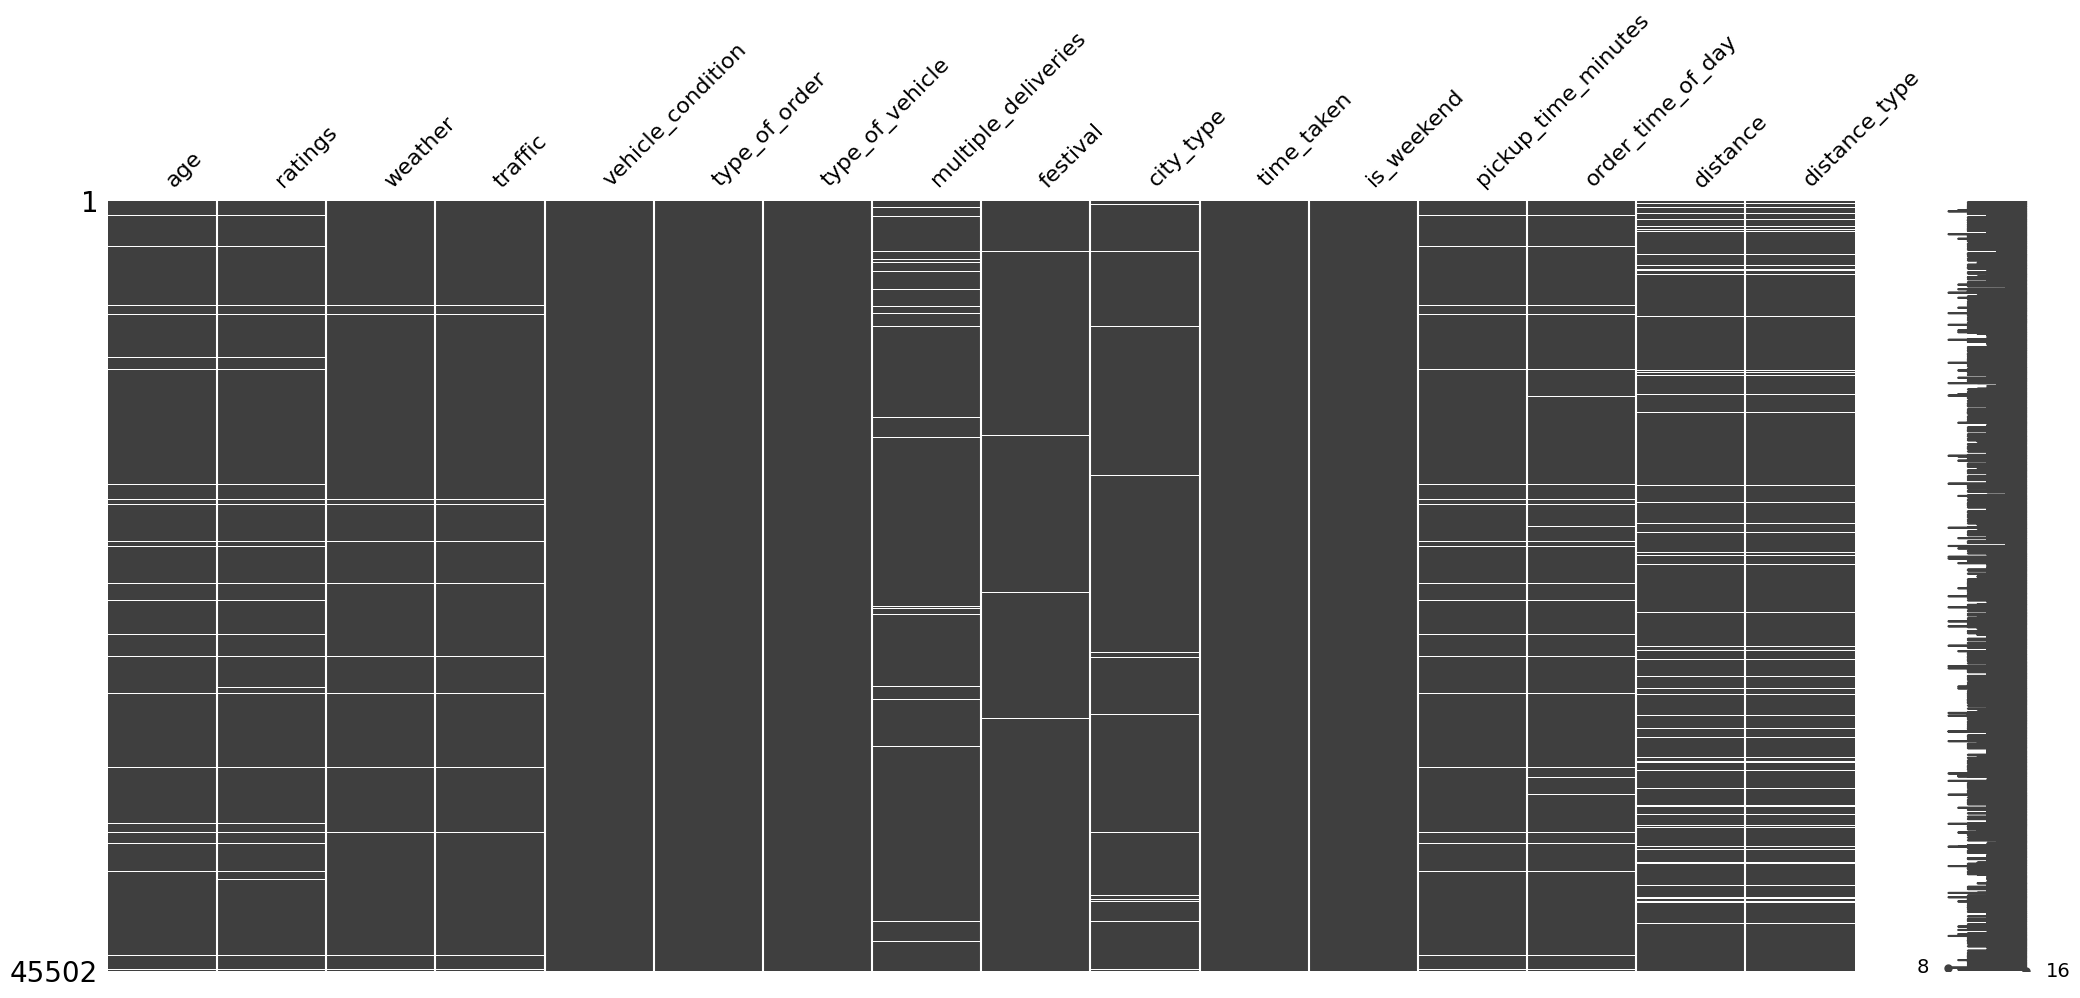

In [48]:
import missingno as msno
msno.matrix(df)

In [49]:
missing_cols = (
                    df
                    .isna()
                    .any(axis=0)
                    .loc[lambda x: x]
                    .index
                )

missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

In [50]:
temp_df = df.copy().dropna()

In [51]:
# split into X and y

X = temp_df.drop(columns='time_taken')
y = temp_df['time_taken']

X

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,1,15.0,morning,3.025149,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,0,5.0,evening,20.183530,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,1,15.0,morning,1.552758,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,0,10.0,evening,7.790401,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,1,15.0,afternoon,6.210138,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45496,35.0,4.2,windy,jam,2,drinks,motorcycle,1.0,no,metropolitian,0,10.0,night,16.600272,very_long
45497,30.0,4.8,windy,high,1,meal,motorcycle,0.0,no,metropolitian,0,10.0,morning,1.489846,short
45499,30.0,4.9,cloudy,low,1,drinks,scooter,0.0,no,metropolitian,0,15.0,night,4.657195,short
45500,20.0,4.7,cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,0,5.0,afternoon,6.232393,medium


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
# transform target column

pt = PowerTransformer()

y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))

In [54]:
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

In [55]:
num_cols = ["age","ratings","pickup_time_minutes","distance"]

nominal_cat_cols = ['weather',
                    'type_of_order',
                    'type_of_vehicle',
                    "festival",
                    "city_type",
                    "is_weekend",
                    "order_time_of_day"]

ordinal_cat_cols = ["traffic","distance_type"]

In [56]:
traffic_order = ["low","medium","high","jam"]
distance_type_order = ["short","medium","long","very_long"]

In [57]:
# build a preprocessor

preprocessor = ColumnTransformer(transformers=[
    ("scale", MinMaxScaler(), num_cols),
    ("nominal_encode", OneHotEncoder(drop="first",handle_unknown="ignore",
                                     sparse_output=False), nominal_cat_cols),
    ("ordinal_encode", OrdinalEncoder(categories=[traffic_order,distance_type_order],
                                      encoded_missing_value=-999,
                                      handle_unknown="use_encoded_value",
                                      unknown_value=-1), ordinal_cat_cols)
],remainder="passthrough",n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)


preprocessor

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time_minutes',
                                  'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'festival', 'city_type', 'is_weekend',
                                  'order_time_of_day']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']],
                                                encoded_missing_value=-999,
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['traffic', 'distance_type'])],
                  verbose_feature_names_out=False)

In [58]:
# build the pipeline

processing_pipeline = Pipeline(steps=[
                                ("preprocess",preprocessor)
                            ])

processing_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('scale', MinMaxScaler(),
                                                  ['age', 'ratings',
                                                   'pickup_time_minutes',
                                                   'distance']),
                                                 ('nominal_encode',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['weather', 'type_of_order',
                                                   'type_of_vehicle',
                                                   'festival', 'city_type',
                                                   'is_weekend',
                                                   'order_time_of_day']),
                                                 ('ordinal_encode',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high',
                                                                              'jam'],
                                                                             ['short',
                                                                              'medium',
                                                                              'long',
                                                                              'very_long']],
                                                                 encoded_missing_value=-999,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['traffic',
                                                   'distance_type'])],
                                   verbose_feature_names_out=False))])

In [59]:
X_train_trans = processing_pipeline.fit_transform(X_train)
X_test_trans = processing_pipeline.transform(X_test)

In [60]:
%pip install optuna

In [61]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import optuna

In [62]:
from sklearn.metrics import r2_score, mean_absolute_error

In [63]:
def objective(trial):
    with mlflow.start_run(nested=True):
        model_name = trial.suggest_categorical("model",["SVM","RF","KNN","GB","XGB","LGBM"])

        if model_name == "SVM":
            kernel_svm = trial.suggest_categorical("kernel_svm",["linear","poly","rbf"])
            if kernel_svm == "linear":
                c_linear = trial.suggest_float("c_linear",0,10)
                model = SVR(C=c_linear,kernel="linear")

            elif kernel_svm == "poly":
                c_poly = trial.suggest_float("c_poly",0,10)
                degree_poly = trial.suggest_int("degree_poly",1,5)
                model = SVR(C=c_poly,degree=degree_poly,
                            kernel="poly")

            else:
                c_rbf = trial.suggest_float("c_rbf",0,100)
                gamma_rbf = trial.suggest_float("gamma_rbf",0,10)
                model = SVR(C=c_rbf,gamma=gamma_rbf,
                            kernel="rbf")

        elif model_name == "RF":
            n_estimators_rf = trial.suggest_int("n_estimators_rf",10,200)
            max_depth_rf = trial.suggest_int("max_depth_rf",2,20)
            model = RandomForestRegressor(n_estimators=n_estimators_rf,
                                        max_depth=max_depth_rf,
                                        random_state=42,
                                        n_jobs=-1)

        elif model_name == "GB":
            n_estimators_gb = trial.suggest_int("n_estimators_gb",10,200)
            learning_rate_gb = trial.suggest_float("learning_rate_gb",0,1)
            max_depth_gb = trial.suggest_int("max_depth_gb",2,20)
            model = GradientBoostingRegressor(n_estimators=n_estimators_gb,
                                                learning_rate=learning_rate_gb,
                                                max_depth=max_depth_gb,
                                                random_state=42)

        elif model_name == "KNN":
            n_neighbors_knn = trial.suggest_int("n_neighbors_knn",1,25)
            weights_knn = trial.suggest_categorical("weights_knn",["uniform","distance"])
            model = KNeighborsRegressor(n_neighbors=n_neighbors_knn,
                                        weights=weights_knn,n_jobs=-1)

        elif model_name == "XGB":
            n_estimators_xgb = trial.suggest_int("n_estimators_xgb",10,200)
            learning_rate_xgb = trial.suggest_float("learning_rate_xgb",0.1,0.5)
            max_depth_xgb = trial.suggest_int("max_depth_xgb",2,20)
            model = XGBRegressor(n_estimators=n_estimators_xgb,
                                    learning_rate=learning_rate_xgb,
                                    max_depth=max_depth_xgb,
                                    random_state=42,
                                    n_jobs=-1)

        elif model_name == "LGBM":
            n_estimators_lgbm = trial.suggest_int("n_estimators_lgbm",10,200)
            learning_rate_lgbm = trial.suggest_float("learning_rate_lgbm",0.1,0.5)
            max_depth_lgbm = trial.suggest_int("max_depth_lgbm",2,20)
            model = LGBMRegressor(n_estimators=n_estimators_lgbm,
                                    learning_rate=learning_rate_lgbm,
                                    max_depth=max_depth_lgbm,
                                    random_state=42)


        # train the model
        model.fit(X_train_trans,y_train_pt.values.ravel())

        # log model params
        mlflow.log_params(model.get_params())

        # get the predictions
        y_pred_train = model.predict(X_train_trans)
        y_pred_test = model.predict(X_test_trans)

        # get the actual predictions values
        y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
        y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

        # calculate the error
        error = mean_absolute_error(y_test,y_pred_test_org)

        # log model_name
        mlflow.log_param("model",model_name)

        # log error
        mlflow.log_metric("MAE",error)

        return error

In [64]:
# create optuna study
study = optuna.create_study(direction="minimize",study_name="model_selection")

with mlflow.start_run(run_name="Best Model") as parent:
    # optimize the objective function
    study.optimize(objective,n_trials=30,n_jobs=-1)

    # log the best parameters
    mlflow.log_params(study.best_params)

    # log the best score
    mlflow.log_metric("best_score",study.best_value)

[I 2025-06-20 09:56:14,077] A new study created in memory with name: model_selection
[I 2025-06-20 09:56:15,524] Trial 1 finished with value: 3.1114736684928044 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 32, 'learning_rate_lgbm': 0.3266428260871197, 'max_depth_lgbm': 7}. Best is trial 1 with value: 3.1114736684928044.


🏃 View run delicate-turtle-106 at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2/runs/248ff2669e9749e3b781ef47ab4168db
🧪 View experiment at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2
🏃 View run gifted-fox-442 at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2/runs/480bb9f852844df4921b52ea27b09673
🧪 View experiment at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2


[I 2025-06-20 09:56:21,168] Trial 0 finished with value: 3.0315025096321073 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 174, 'learning_rate_lgbm': 0.19462358101999855, 'max_depth_lgbm': 14}. Best is trial 0 with value: 3.0315025096321073.
[I 2025-06-20 09:56:44,202] Trial 2 finished with value: 3.1518197053388577 and parameters: {'model': 'RF', 'n_estimators_rf': 173, 'max_depth_rf': 11}. Best is trial 0 with value: 3.0315025096321073.


🏃 View run clean-croc-612 at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2/runs/d9149de3ec674bc982549a2bd641260b
🧪 View experiment at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2
🏃 View run amazing-lynx-427 at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2/runs/25f2af5e37874b509c134b92c5ce6916
🧪 View experiment at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2


[I 2025-06-20 09:56:46,742] Trial 4 finished with value: 3.53150356433783 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 191, 'learning_rate_lgbm': 0.29844957764430535, 'max_depth_lgbm': 2}. Best is trial 0 with value: 3.0315025096321073.
[I 2025-06-20 09:58:16,239] Trial 3 finished with value: 3.5500551538475036 and parameters: {'model': 'GB', 'n_estimators_gb': 178, 'learning_rate_gb': 0.32734026124518856, 'max_depth_gb': 19}. Best is trial 0 with value: 3.0315025096321073.


🏃 View run upset-pug-437 at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2/runs/e1fa1d63190a4e3583ed46b7e76c4a4d
🧪 View experiment at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2


[I 2025-06-20 10:14:26,164] Trial 5 finished with value: 4.675445866266832 and parameters: {'model': 'SVM', 'kernel_svm': 'linear', 'c_linear': 6.860439062465373}. Best is trial 0 with value: 3.0315025096321073.


🏃 View run legendary-mink-838 at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2/runs/d150ad655ba34190995012357873d4de
🧪 View experiment at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2


[I 2025-06-20 10:14:44,354] Trial 7 finished with value: 3.94072487152746 and parameters: {'model': 'GB', 'n_estimators_gb': 171, 'learning_rate_gb': 0.8762098565672063, 'max_depth_gb': 20}. Best is trial 0 with value: 3.0315025096321073.


🏃 View run illustrious-bat-807 at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2/runs/e25eca4e628d4d71b1c1defaf2c478ec
🧪 View experiment at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2


[I 2025-06-20 10:15:05,058] Trial 8 finished with value: 4.189887533914583 and parameters: {'model': 'KNN', 'n_neighbors_knn': 13, 'weights_knn': 'distance'}. Best is trial 0 with value: 3.0315025096321073.


🏃 View run peaceful-bee-905 at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2/runs/270fceef5b4645daaed8808033c422b0
🧪 View experiment at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2


[I 2025-06-20 10:15:24,198] Trial 9 finished with value: 4.200603423899283 and parameters: {'model': 'KNN', 'n_neighbors_knn': 17, 'weights_knn': 'distance'}. Best is trial 0 with value: 3.0315025096321073.


🏃 View run classy-shrike-716 at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2/runs/56c7e557cb064870882e6ccb5edf8633
🧪 View experiment at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2


[I 2025-06-20 10:15:44,483] Trial 10 finished with value: 4.191284032630441 and parameters: {'model': 'KNN', 'n_neighbors_knn': 15, 'weights_knn': 'distance'}. Best is trial 0 with value: 3.0315025096321073.


🏃 View run unique-cat-880 at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2/runs/396b7f82d16b447daeced65034b37278
🧪 View experiment at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2


[I 2025-06-20 10:16:23,773] Trial 11 finished with value: 3.3691465854644775 and parameters: {'model': 'XGB', 'n_estimators_xgb': 107, 'learning_rate_xgb': 0.2938497192163141, 'max_depth_xgb': 18}. Best is trial 0 with value: 3.0315025096321073.


🏃 View run marvelous-panda-688 at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2/runs/7daf77a03c73419a970a4f0f7868caad
🧪 View experiment at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2
🏃 View run gentle-quail-236 at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2/runs/4bfcba650a38430ca618117876f1f6c3
🧪 View experiment at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2


[I 2025-06-20 10:16:26,334] Trial 12 finished with value: 3.4654868240233143 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 11, 'learning_rate_lgbm': 0.1801897016285706, 'max_depth_lgbm': 14}. Best is trial 0 with value: 3.0315025096321073.


🏃 View run bouncy-squid-4 at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2/runs/7be34041f1c44aabbbd7ba3079a0d9c8
🧪 View experiment at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2


[I 2025-06-20 10:16:34,326] Trial 13 finished with value: 3.0904539471937382 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 81, 'learning_rate_lgbm': 0.3650596847324916, 'max_depth_lgbm': 8}. Best is trial 0 with value: 3.0315025096321073.


🏃 View run dapper-shrike-357 at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2/runs/24ca13437a7c40d1a783aa7138f9092b
🧪 View experiment at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2


[I 2025-06-20 10:16:42,321] Trial 14 finished with value: 3.143302706047691 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 121, 'learning_rate_lgbm': 0.4785311116575989, 'max_depth_lgbm': 16}. Best is trial 0 with value: 3.0315025096321073.


🏃 View run caring-hen-571 at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2/runs/48c6088c573c474487e4b537d0aaa958
🧪 View experiment at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2


[I 2025-06-20 10:16:50,337] Trial 15 finished with value: 3.0519291293509774 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 94, 'learning_rate_lgbm': 0.1005783183897964, 'max_depth_lgbm': 9}. Best is trial 0 with value: 3.0315025096321073.


🏃 View run resilient-fox-529 at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2/runs/0253e38870e540bf9f8601e93d35bb9b
🧪 View experiment at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2


[I 2025-06-20 10:16:58,411] Trial 16 finished with value: 4.094326972961426 and parameters: {'model': 'XGB', 'n_estimators_xgb': 11, 'learning_rate_xgb': 0.4937032955746135, 'max_depth_xgb': 2}. Best is trial 0 with value: 3.0315025096321073.


🏃 View run charming-rat-186 at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2/runs/4cbb9716fbf742d293df38a6b168acce
🧪 View experiment at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2


[I 2025-06-20 10:17:06,333] Trial 17 finished with value: 5.864695251897742 and parameters: {'model': 'RF', 'n_estimators_rf': 16, 'max_depth_rf': 2}. Best is trial 0 with value: 3.0315025096321073.
[I 2025-06-20 10:18:41,295] Trial 6 finished with value: 6.348663072431205 and parameters: {'model': 'SVM', 'kernel_svm': 'rbf', 'c_rbf': 42.97859928141163, 'gamma_rbf': 5.258987158968473}. Best is trial 0 with value: 3.0315025096321073.


🏃 View run overjoyed-bug-999 at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2/runs/4ab560e9b4cd4eadb1fe4140b910826d
🧪 View experiment at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2


[I 2025-06-20 10:18:44,027] Trial 19 finished with value: 3.0277414114018666 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 139, 'learning_rate_lgbm': 0.10839420679337818, 'max_depth_lgbm': 20}. Best is trial 19 with value: 3.0277414114018666.


🏃 View run abundant-shrew-334 at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2/runs/9532990a707446e29982d7c0e23c439a
🧪 View experiment at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2
🏃 View run gregarious-frog-292 at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2/runs/f998b3105e6941209b1e795b435885e8
🧪 View experiment at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2


[I 2025-06-20 10:18:51,849] Trial 20 finished with value: 3.0355899944743427 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 170, 'learning_rate_lgbm': 0.17194253812850846, 'max_depth_lgbm': 20}. Best is trial 19 with value: 3.0277414114018666.


🏃 View run amazing-hound-977 at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2/runs/322f2d5c301a4b8b8e0ce67936c58764
🧪 View experiment at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2


[I 2025-06-20 10:18:59,840] Trial 21 finished with value: 3.026986808232949 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 145, 'learning_rate_lgbm': 0.1022632379895709, 'max_depth_lgbm': 20}. Best is trial 21 with value: 3.026986808232949.


🏃 View run shivering-tern-802 at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2/runs/589fd44f66b24cec8b3fde6483fa8945
🧪 View experiment at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2


[I 2025-06-20 10:19:07,843] Trial 22 finished with value: 3.0340729787749012 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 146, 'learning_rate_lgbm': 0.10029723121964014, 'max_depth_lgbm': 20}. Best is trial 21 with value: 3.026986808232949.


🏃 View run thundering-moth-122 at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2/runs/d72f5ee4573d4918b8042c2a56c915e9
🧪 View experiment at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2


[I 2025-06-20 10:19:15,851] Trial 23 finished with value: 3.025455807845392 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 144, 'learning_rate_lgbm': 0.18662497789343022, 'max_depth_lgbm': 16}. Best is trial 23 with value: 3.025455807845392.


🏃 View run thoughtful-skink-860 at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2/runs/becef9ee14f74fdca2cc1040258f7830
🧪 View experiment at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2


[I 2025-06-20 10:19:23,869] Trial 24 finished with value: 3.0262885955597 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 140, 'learning_rate_lgbm': 0.14833543768889218, 'max_depth_lgbm': 18}. Best is trial 23 with value: 3.025455807845392.


🏃 View run overjoyed-carp-130 at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2/runs/d26db98b03bf4e31af873d1f83d57f39
🧪 View experiment at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2


[I 2025-06-20 10:19:31,848] Trial 25 finished with value: 3.0434998885336 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 142, 'learning_rate_lgbm': 0.2227386300074361, 'max_depth_lgbm': 16}. Best is trial 23 with value: 3.025455807845392.


🏃 View run luminous-doe-97 at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2/runs/5f5c14586a664fd9b90776f4ba982640
🧪 View experiment at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2


[I 2025-06-20 10:19:39,843] Trial 26 finished with value: 3.0450599193573 and parameters: {'model': 'XGB', 'n_estimators_xgb': 199, 'learning_rate_xgb': 0.11798473017251643, 'max_depth_xgb': 7}. Best is trial 23 with value: 3.025455807845392.


🏃 View run intrigued-tern-914 at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2/runs/be77930a1fe9410aa8614cd019810517
🧪 View experiment at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2


[I 2025-06-20 10:19:47,847] Trial 27 finished with value: 7.317616788519808 and parameters: {'model': 'GB', 'n_estimators_gb': 13, 'learning_rate_gb': 0.004375433518200911, 'max_depth_gb': 2}. Best is trial 23 with value: 3.025455807845392.
[I 2025-06-20 10:20:07,249] Trial 28 finished with value: 3.097379062996435 and parameters: {'model': 'RF', 'n_estimators_rf': 59, 'max_depth_rf': 20}. Best is trial 23 with value: 3.025455807845392.


🏃 View run luxuriant-yak-219 at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2/runs/30cf24ec54ea478e85cc9b90d7a9846d
🧪 View experiment at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2


[I 2025-06-20 10:24:25,616] Trial 29 finished with value: 4.00363306480907 and parameters: {'model': 'SVM', 'kernel_svm': 'poly', 'c_poly': 0.7861201198201906, 'degree_poly': 2}. Best is trial 23 with value: 3.025455807845392.


🏃 View run melodic-rook-362 at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2/runs/479719e6d1bd4edd935a0a65ca2e6f37
🧪 View experiment at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2


[I 2025-06-20 10:29:32,869] Trial 18 finished with value: 3.7385339045766997 and parameters: {'model': 'SVM', 'kernel_svm': 'poly', 'c_poly': 4.948492571752787, 'degree_poly': 3}. Best is trial 23 with value: 3.025455807845392.


🏃 View run magnificent-crow-744 at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2/runs/e2a1bbaedc004d89add59ab7098f4619
🧪 View experiment at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2
🏃 View run Best Model at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2/runs/2eec390a45914a4782ac93f60438533c
🧪 View experiment at: https://dagshub.com/subham-28/ML_Projects.mlflow/#/experiments/2


In [65]:
study.best_value

3.025455807845392

In [80]:
study.best_trial.params

{'model': 'LGBM',
 'n_estimators_lgbm': 144,
 'learning_rate_lgbm': 0.18662497789343022,
 'max_depth_lgbm': 16}

In [81]:
lgbm_params = {
    "n_estimators": 144,
    "learning_rate": 0.18662497789343022,
    "max_depth": 16
}

In [82]:
lgbm = LGBMRegressor(**lgbm_params)
lgbm.fit(X_train_trans,y_train_pt.values.ravel())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 352
[LightGBM] [Info] Number of data points in the train set: 30156, number of used features: 25
[LightGBM] [Info] Start training from score -0.000000


LGBMRegressor(learning_rate=0.18662497789343022, max_depth=16, n_estimators=144)

In [83]:
y_pred_train = lgbm.predict(X_train_trans)
y_pred_test = lgbm.predict(X_test_trans)

In [84]:
y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

In [85]:
from sklearn.metrics import mean_absolute_error, r2_score

print(f"The train error is {mean_absolute_error(y_train,y_pred_train_org):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test,y_pred_test_org):.2f} minutes")

The train error is 2.76 minutes
The test error is 3.03 minutes


In [86]:
print(f"The train r2 score is {r2_score(y_train,y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test,y_pred_test_org):.2f}")

The train r2 score is 0.87
The test r2 score is 0.84


In [87]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_c_linear,params_c_poly,params_c_rbf,params_degree_poly,params_gamma_rbf,...,params_max_depth_rf,params_max_depth_xgb,params_model,params_n_estimators_gb,params_n_estimators_lgbm,params_n_estimators_rf,params_n_estimators_xgb,params_n_neighbors_knn,params_weights_knn,state
0,0,3.031503,2025-06-20 09:56:14.178901,2025-06-20 09:56:21.168053,0 days 00:00:06.989152,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,LGBM,NaN,174.0,NaN,NaN,NaN,NaN,COMPLETE
1,1,3.111474,2025-06-20 09:56:14.186554,2025-06-20 09:56:15.524666,0 days 00:00:01.338112,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,LGBM,NaN,32.0,NaN,NaN,NaN,NaN,COMPLETE
2,2,3.151820,2025-06-20 09:56:15.530674,2025-06-20 09:56:44.202585,0 days 00:00:28.671911,NaN,NaN,NaN,NaN,NaN,...,11.0,NaN,RF,NaN,NaN,173.0,NaN,NaN,NaN,COMPLETE
3,3,3.550055,2025-06-20 09:56:21.180974,2025-06-20 09:58:16.239671,0 days 00:01:55.058697,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,GB,178.0,NaN,NaN,NaN,NaN,NaN,COMPLETE
4,4,3.531504,2025-06-20 09:56:44.206610,2025-06-20 09:56:46.742344,0 days 00:00:02.535734,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,LGBM,NaN,191.0,NaN,NaN,NaN,NaN,COMPLETE
5,5,4.675446,2025-06-20 09:56:46.748020,2025-06-20 10:14:26.164380,0 days 00:17:39.416360,6.860439,NaN,NaN,NaN,NaN,...,NaN,NaN,SVM,NaN,NaN,NaN,NaN,NaN,NaN,COMPLETE
6,6,6.348663,2025-06-20 09:58:16.248832,2025-06-20 10:18:41.295563,0 days 00:20:25.046731,NaN,NaN,42.978599,NaN,5.258987,...,NaN,NaN,SVM,NaN,NaN,NaN,NaN,NaN,NaN,COMPLETE
7,7,3.940725,2025-06-20 10:14:26.166950,2025-06-20 10:14:44.354298,0 days 00:00:18.187348,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,GB,171.0,NaN,NaN,NaN,NaN,NaN,COMPLETE
8,8,4.189888,2025-06-20 10:14:44.356515,2025-06-20 10:15:05.058420,0 days 00:00:20.701905,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,KNN,NaN,NaN,NaN,NaN,13.0,distance,COMPLETE
9,9,4.200603,2025-06-20 10:15:05.060722,2025-06-20 10:15:24.198093,0 days 00:00:19.137371,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,KNN,NaN,NaN,NaN,NaN,17.0,distance,COMPLETE


In [88]:
study.trials_dataframe()['params_model'].value_counts()

,count
params_model,
LGBM,14
SVM,4
RF,3
GB,3
KNN,3
XGB,3


In [89]:
# avg scores for all tested models

study.trials_dataframe().groupby("params_model")['value'].mean().sort_values()

,value
params_model,
LGBM,3.117521
XGB,3.502844
RF,4.037965
KNN,4.193925
SVM,4.691569
GB,4.936132


In [90]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(regressor=lgbm,
                                    transformer=pt)

In [91]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model,
                         X_train_trans,
                         y_train,
                         scoring="neg_mean_absolute_error",
                         cv=5,n_jobs=-1)

-scores.mean()

np.float64(3.068318427873426)

In [92]:
optuna.visualization.plot_optimization_history(study)

In [93]:
optuna.visualization.plot_parallel_coordinate(study,params=["model"])